### Importing libraries ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing Stackoverflow survey 2020 data ###

In [3]:
df = pd.read_csv('data/survey_results_public.csv')
df.head()


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
df.shape

(64461, 61)

In [7]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [9]:
df_schema = pd.read_csv('data/survey_results_schema.csv', index_col = 'Column')
df_schema.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...


In [10]:
schema_raw = df_schema['QuestionText']
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## Data Preparation and Cleaning ##

While the survey contains the wealth of information, we will restrict our analysis to the following areas:
* Demographics of the survey and the global programming community.
* Distribution of programming skills, experience and preferences.
* Employment-related information, preferences & opinions.

Let's select the set of columns with the relevant data for our analysis. 


In [13]:
selected_columns= [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [14]:
len(selected_columns)

20

In [15]:
survey_df = df[selected_columns].copy()

In [16]:
schema = schema_raw[selected_columns].copy()

In [17]:
survey_df.shape

(64461, 20)

In [18]:
schema.shape

(20,)

In [20]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [29]:
schema.JobFactors

'Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?'

In [30]:
survey_df['JobFactors'].head(10)

0    Languages, frameworks, and other technologies ...
1                                                  NaN
2                                                  NaN
3    Flex time or a flexible schedule;Office enviro...
4                                                  NaN
5    Diversity of the company or organization;Langu...
6                                                  NaN
7    Remote work options;Opportunities for professi...
8    Diversity of the company or organization;Remot...
9    Flex time or a flexible schedule;How widely us...
Name: JobFactors, dtype: object

In [35]:
survey_df.YearsCode.unique(),

(array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
        '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
        '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
        '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
        '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
        '49', '48'], dtype=object),)

In [36]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'], errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors = 'coerce')

In [37]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [40]:
survey_df.drop(survey_df[survey_df['Age'] < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df['Age'] > 100].index, inplace = True)

In [41]:
survey_df.drop(survey_df[survey_df['WorkWeekHrs'] > 140].index, inplace= True)

In [54]:
survey_df['Gender'].value_counts(dropna = False)

Man                                                            45895
NaN                                                            13880
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [46]:
import numpy as np

In [61]:
survey_df.where(~(survey_df['Gender'].str.contains(';', na= False)), np.nan, inplace = True)

In [62]:
survey_df['Gender'].value_counts(dropna = False)

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [63]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
26671,India,20.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,18.0,5.0,NaN,C;HTML/CSS;Java;JavaScript;SQL,Go;Java;JavaScript;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack",NaN,NaN,Flex time or a flexible schedule;Financial per...,NaN,NaN
57189,Italy,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",No,10.0,10.0,7.0,Bash/Shell/PowerShell;C#;SQL;VBA,Bash/Shell/PowerShell;C#;R,Once a decade,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, deskto...",40.0,Slightly satisfied,Flex time or a flexible schedule;Specific depa...,Often: 1-2 days per week or more,Fairly important
25339,India,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,16.0,6.0,4.0,HTML/CSS;Java;JavaScript;Python,Go;HTML/CSS;Java;JavaScript;Kotlin;Python,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",33.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Somewhat important
18625,Canada,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",No,18.0,10.0,4.0,Bash/Shell/PowerShell;Python;SQL,Go;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Engineer, data",40.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Specific depa...,Rarely: 1-2 days per year or less,Fairly important
20569,Australia,50.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,32.0,20.0,C#;JavaScript;Scala,C#;Haskell;JavaScript;Scala,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
47760,Viet Nam,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Python,NaN,Every few months,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
34469,Switzerland,NaN,Man,"Associate degree (A.A., A.S., etc.)","A business discipline (such as accounting, fin...",Yes,18.0,3.0,2.0,NaN,Bash/Shell/PowerShell;HTML/CSS;SQL,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, desktop or enterprise applications;...",48.0,Very satisfied,Flex time or a flexible schedule;Financial per...,Often: 1-2 days per week or more,Not at all important/not necessary
36999,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,21.0,10.0,5.0,Bash/Shell/PowerShell;Perl;SQL,HTML/CSS;JavaScript;Python;R;Swift;TypeScript,Every few months,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
51031,United Kingdom,21.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,7.0,NaN,C;C++;HTML/CSS;PHP;Python,JavaScript;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Office enviro...,NaN,NaN
13173,Italy,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,10.0,39.0,26.0,C#;SQL,C#,Once every few years,Meditate;Play games;Call a coworker or friend;...,Employed full-time,"Designer;Developer, back-end;Developer, deskto...",NaN,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro..

In [68]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [72]:
survey_df['Country'].nunique()

183

In [73]:
top_countries= survey_df['Country'].value_counts().head(15)

In [74]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

### Plotting a bar chart for the top countries ###

C:\Users\rijul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


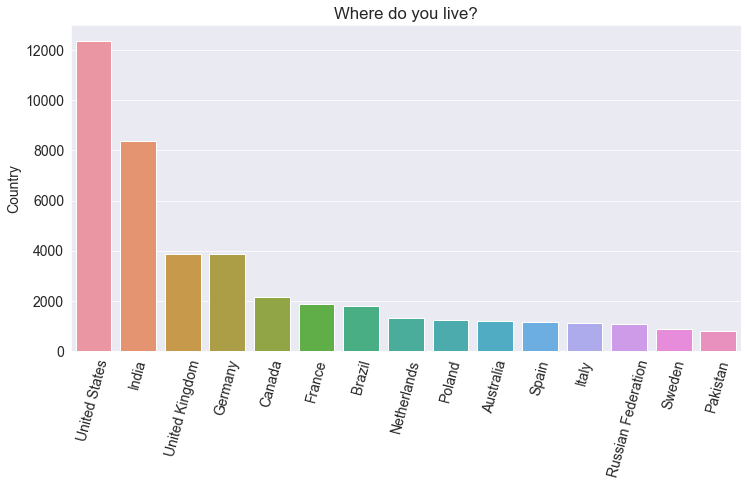

In [203]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(top_countries.index, top_countries);

### Percentage of countries speaking English vs Non-English ###

In [113]:
languages_spoken = pd.read_csv('data/English_vs_Non-English.csv')

In [114]:
languages_spoken['Country'].nunique()

198

In [116]:
languages_spoken['Country'].replace('Russia', 'Russian Federation', inplace = True)

In [117]:
languages_spoken.set_index('Country', inplace = True)

In [120]:
languages_spoken.loc['Russian Federation']

Languages Spoken    Russian, others
Name: Russian Federation, dtype: object

In [143]:
countries = []
for country in survey_df['Country'].unique():
    if country in languages_spoken.index:
        countries.append(country)
print(len(countries))

162


In [179]:
count = 0
for row in languages_spoken.loc[countries]['Languages Spoken']:
    if 'English' in row:
        count +=1
    else:
        count +=0
print(count)

72


In [191]:
filt = languages_spoken['Languages Spoken'] == 'English'
languages_spoken.loc[filt]

,Languages Spoken
Country,
Barbados,English
St. Kitts and Nevis,English


In [200]:
language_list = languages_spoken['Languages Spoken'].str.split(',')
for lang in language_list:
    if len(lang) == 1:
        print(lang)
    

['English']
['French (official); native African (Sudanic) languages 90%']
['Spanish']
['Spanish']
['French (official) and African languages (Dioula esp.)']
['Spanish']
['Czech']
['English (official) and French patois']
['Spanish']
['German']
['Creole and French (both official)']
['Japanese']
['Korean']
['Malagasy and French (both official)']
['Maldivian Dhivehi (official); English spoken by most government officials']
['Maltese and English (both official)']
['Serbian/Montenegrin (Ijekavian dialect—official)']
['Spanish 98% (official); English and indigenous languages on Atlantic coast (1995)']
['Polish 98% (2002)']
['Arabic (official); English a common second language']
['English']
['Italian']
['Portuguese (official)']
['Arabic']
['Arabic']


### Age Plots ###

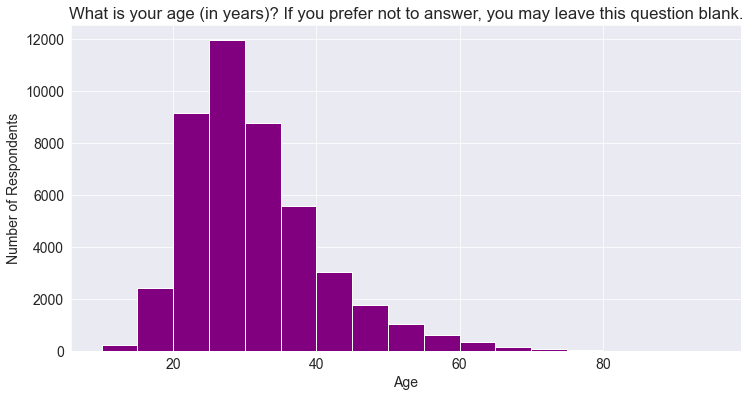

In [182]:
plt.figure(figsize = (12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')

plt.hist(survey_df['Age'], bins =np.arange(10,100,5), color = 'purple');

### Gender Plot ###

In [201]:
gender_counts = survey_df['Gender'].value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

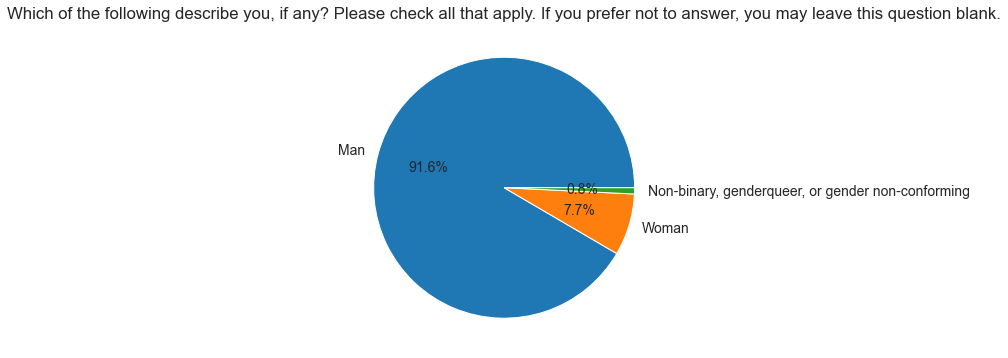

In [202]:
plt.figure(figsize =(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%');

In [214]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

C:\Users\rijul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

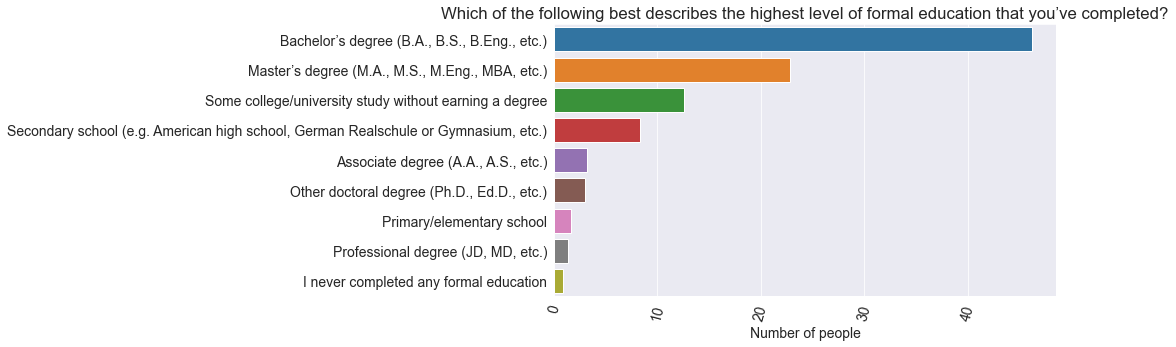

In [222]:
y = (survey_df.EdLevel.value_counts() / survey_df.EdLevel.count()) *100
sns.barplot(y,y.index)
# sns.countplot(y = survey_df['EdLevel'])
plt.xlabel('Number of people')
plt.title(schema.EdLevel)
plt.xticks(rotation = 75)
plt.ylabel(None)

In [223]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [225]:
survey_df['UndergradMajor'].value_counts() * 100/survey_df['UndergradMajor'].count()

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

C:\Users\rijul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

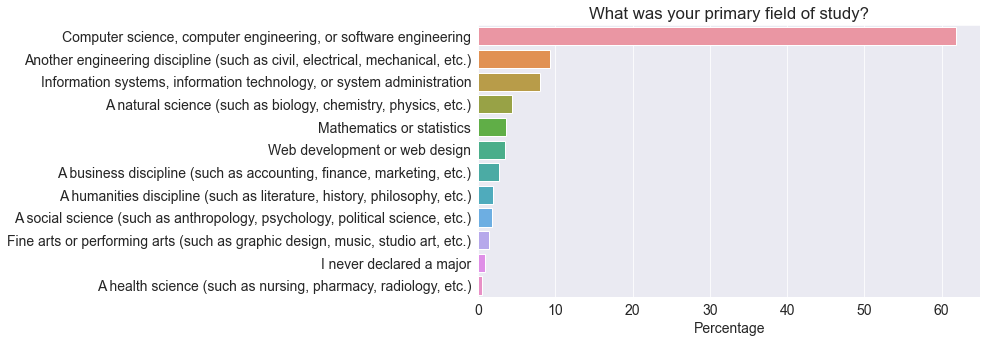

In [228]:
undergrad_pct = survey_df['UndergradMajor'].value_counts() * 100/survey_df['UndergradMajor'].count()
sns.barplot(undergrad_pct, undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.xlabel('Percentage')
plt.ylabel(None)

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [245]:
df = pd.DataFrame({'species': ['bear', 'bear', 'marsupial'],'population': [1864, 22000, 80000]},index=['0', '1', '2'])
df

,species,population
0,bear,1864
1,bear,22000
2,marsupial,80000


In [243]:
for label, content in df.iteritems():
    print(f'label: {label}')
    print(f'content: {content}', sep='\n')
    

label: species
content: panda         bear
polar         bear
koala    marsupial
Name: species, dtype: object
label: population
content: panda     1864
polar    22000
koala    80000
Name: population, dtype: int64


In [247]:
for label, content in df.iteritems():
#     print(label)
    print(content)

0         bear
1         bear
2    marsupial
Name: species, dtype: object
0     1864
1    22000
2    80000
Name: population, dtype: int64


In [256]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, label in col_series[col_series.notnull()].iteritems():
        for option in label.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.loc[idx, option] = True
    return result_df[options]

In [257]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [258]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
